In [4]:
# Install necessary libraries (run this if required)
!pip install -q pandas numpy matplotlib seaborn scikit-learn

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Enable inline plotting for Colab
%matplotlib inline


In [5]:
  # Load the dataset
dataset_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values in Dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species        

In [7]:
# Select relevant columns (e.g., 'sepal_length', 'sepal_width', 'petal_length')
# For illustration, we assume these columns are used for clustering features
features = df[['sepal_length', 'sepal_width', 'petal_length']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first few rows of the standardized data
print("\nFirst 5 rows of scaled features:")
print(pd.DataFrame(scaled_features, columns=features.columns).head())



First 5 rows of scaled features:
   sepal_length  sepal_width  petal_length
0     -0.900681     1.019004     -1.340227
1     -1.143017    -0.131979     -1.340227
2     -1.385353     0.328414     -1.397064
3     -1.506521     0.098217     -1.283389
4     -1.021849     1.249201     -1.340227


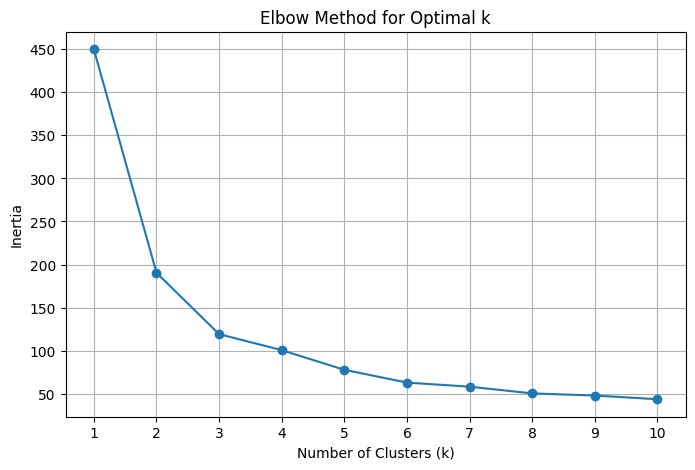

In [9]:
# Elbow Method to find the optimal number of clusters

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [11]:
# Perform K-Means clustering with the optimal k (from the elbow method, assume k=3)
optimal_k = 3

# Fit K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
print(df.head())



First 5 rows with cluster labels:
   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        2
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        2


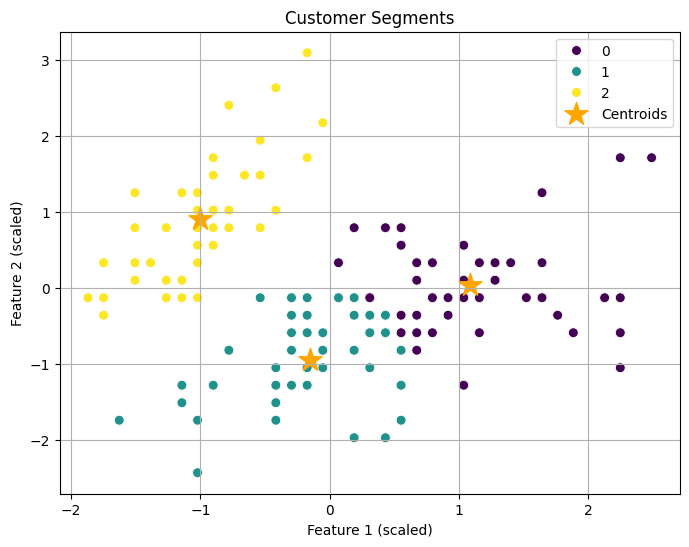

In [15]:
# Visualize clusters (using the first two features for plotting)
plt.figure(figsize=(8, 6))

# Scatter plot of clusters
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=cluster_labels,
    palette='viridis',
    s=50
)

# Plot cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='orange',
    marker='*',
    label="Centroids"
)

plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()
